#  Install Dependencies and Bring in Data

In [1]:
!pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\sashank\AppData\Local\Temp\pip-install-cm_r6yi8\tensorflow-gpu_79745fe556de4ec390ffad5d94233f8b\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did n

In [2]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from youtube_comment_scraper_python import *
youtube.open("https://www.youtube.com/watch?v=C5duQyX7Gec")
response=youtube.video_comments()
data=response['body']

Starting DataKund...


Progress:   0%|                                                                                | 0/200 [00:00<?, ?it/s]

In [4]:
data

{}

In [5]:
df = pd.read_csv(os.path.join('jigsaw-toxic-comment-classification-challenge','train.csv', 'trrain.csv'),low_memory=False)
df.dropna(how='all')

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,28cffd1d2ba52a18,If I were to take the ill-advised action you a...,0,0,0,0,0,0
1,28d0251654b4925d,Thats cos Im a schitzophrenic TOAT. But ure ju...,1,0,0,0,0,0
2,28d346cc8be778ed,Admin Please note this edit https://en.wikiped...,0,0,0,0,0,0
3,28d452e1bc5a252e,is \n\nDare I say Gogo Dodo is a wikihound?,0,0,0,0,0,0
4,28d507b975ff2fef,June 2014 (UTC)\n\nThanks. If you want to crea...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
15476,28db30669922abe4,Nastaliq was officially used in whole of North...,0,0,0,0,0,0
15477,28db30669922abe5,ugly,1,0,0,1,0,0
15478,28db30669922abe6,I will kill you,1,0,0,1,0,0
15479,28db30669922abe7,hurt,1,0,0,0,1,0


In [6]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,28cffd1d2ba52a18,If I were to take the ill-advised action you a...,0,0,0,0,0,0
1,28d0251654b4925d,Thats cos Im a schitzophrenic TOAT. But ure ju...,1,0,0,0,0,0
2,28d346cc8be778ed,Admin Please note this edit https://en.wikiped...,0,0,0,0,0,0
3,28d452e1bc5a252e,is \n\nDare I say Gogo Dodo is a wikihound?,0,0,0,0,0,0
4,28d507b975ff2fef,June 2014 (UTC)\n\nThanks. If you want to crea...,0,0,0,0,0,0


# Data Preprocessing

In [7]:
!pip list

Package                        Version
------------------------------ --------------------
absl-py                        1.4.0
aiofiles                       23.1.0
aiohttp                        3.8.3
aiosignal                      1.3.1
alabaster                      0.7.12
altair                         4.2.2
anaconda-client                1.11.0
anaconda-navigator             2.3.1
anaconda-project               0.11.1
anyascii                       0.3.2
anyio                          3.5.0
appdirs                        1.4.4
argon2-cffi                    21.3.0
argon2-cffi-bindings           21.2.0
arrow                          1.2.2
astroid                        2.11.7
astropy                        5.1
astunparse                     1.6.3
async-timeout                  4.0.2
atomicwrites                   1.4.0
attrs                          21.4.0
Automat                        20.2.0
autopep8                       1.6.0
Babel                          2.9.1
backcall      

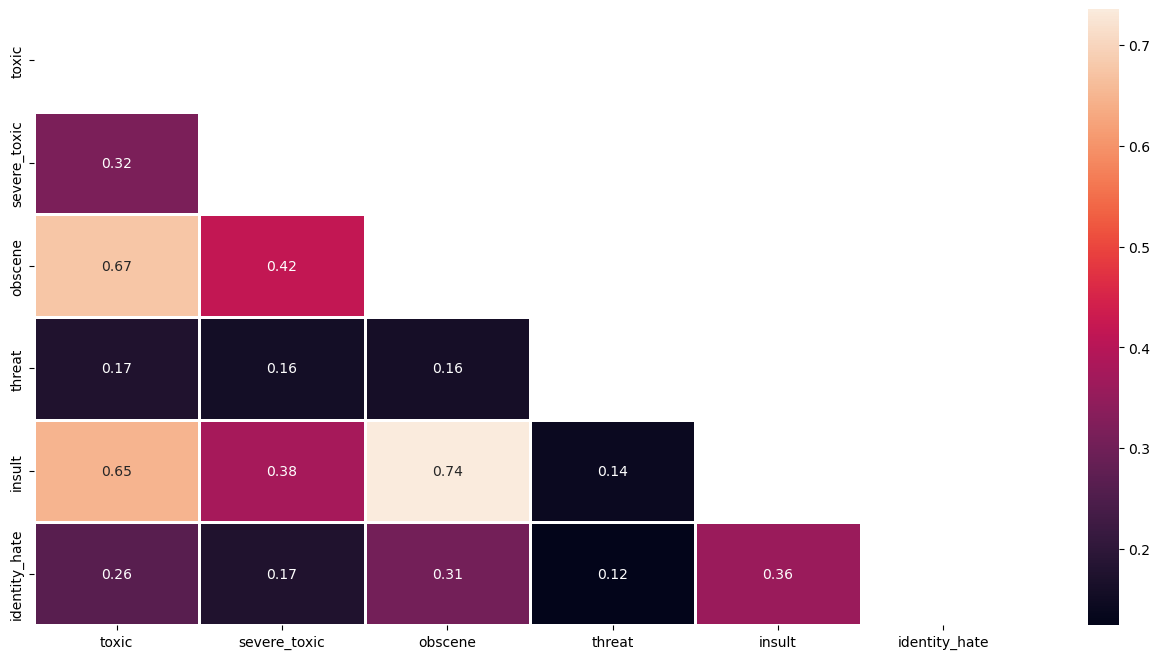

In [8]:
plt.figure(figsize = (16, 8))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1)
plt.show()

In [9]:
# basic statistics like mean, standard deviation, and percentiles
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,15481.00000,15481.000000,15481.000000,15481.000000,15481.000000,15481.000000
mean,0.09573,0.010464,0.052451,0.003488,0.049674,0.008720
std,0.29423,0.101762,0.222943,0.058959,0.217277,0.092978
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
indices=np.random.randint(df.shape[0],size=5)

for i in indices:
    print(i,"--->",df['comment_text'].values[i])

14754 ---> Thanks for the comments...no, no enjoyment here...I was offline due to work...for now on, I'll pretend I am Jesus...I shall let them smack my other cheek after they call me insane, a troll and or blind and they get nary a warning and definitely not a block...as happened just earlier today.
9175 ---> Wrong Strauss 

The summary block at the bottom of the page says Johann Strauss II, not Josef Strauss. Is that a cut-n-paste error?
10246 ---> ", 6 September 2006 (UTC)
This is the point I've been trying to make for ageslook at the content on ED. The WP stuff is like a fraction of it. 30 articles tops? Out of almost 4000. How does that mean that the site exists solely to trash WP?  (T) 23:36"
10200 ---> "

You honestly believe your response to me was ""in no way insulting to anyone""?   Oh, please.  Is this a new way of insulting my intelligence?  I'm pretty sure that when someone tells me I've written the ""the most ridiculous paragraph ever written in the English language"", th

In [11]:
import re

In [12]:
def convert_to_lower_case(text):

    """function to convert the input text to lower case"""
    
    return text.lower()
def remove_escape_char(text):

    """function to remove newline (\n),tab(\t) and slashes (/ , \) from the input text"""

    return re.sub(r"[\n\t\\\/]"," ",text, flags=re.MULTILINE)
def remove_html_tags(text):

    """function to remove html tags (< >) and its content from the input text"""

    return re.sub(r"<.*>"," ",text, flags=re.MULTILINE)
def remove_links(text):
    """function to remove any kind of links with no  html tags"""
    text= re.sub(r"http\S+"," ",text, flags=re.MULTILINE)

    return re.sub(r"www\S+"," ",text, flags=re.MULTILINE)
def remove_digits(text):

    """function to remove digits from the input text"""

    return re.sub(r'\d'," ",text, flags=re.MULTILINE)
def remove_punctuation(text):
    for i in string.punctuation:
        text = text.replace(i, "NA")
    return text      
def chuncking(text):

    """function to perform chucking, which is also referred as shallow parsing.
    This is useful in determing the parts of speech of a given text and adds more
    structure to the input data ."""

    """In this function, we use NLTK library to perform chuncking and if a 
    particular label is PERSON names, we remove that, and names of Geo-graphic
    ares are retained by adding _ in its words.ex-New_York"""


    chunks_data=[]
    chunks_data=(list(ne_chunk(pos_tag(word_tokenize(text)))))
    for label in chunks_data:
        if type(label)==Tree:
            if label.label() == "GPE":
                a = label.leaves()
                if len(a)>1:
                    gpe = "_".join([term for term,pos in a])
                    text = re.sub(rf'{a[1][0]}',gpe,text, flags=re.MULTILINE)
                    text = re.sub(rf'\b{a[0][0]}\b'," ",text, flags=re.MULTILINE)
            if label.label()=="PERSON":      
                for term,pog in label.leaves():
                    text = re.sub(re.escape(term)," ",text, flags=re.MULTILINE)
    return text
def keep_alpha_and_underscore(text):

    """function to keep only aphabets and _ underscore, as we 
    added it in the chunking for geographic locations."""
    
    return re.sub(r"[^a-zA-Z_]"," ",text,flags=re.MULTILINE)
def remove_extra_spaces_if_any(text):

    """function to remove extra spaces if any after all the pre-preocessing"""
    
    return re.sub(r" {2,}", " ", text, flags=re.MULTILINE)

def remove_repeated_characters(text):

    """function to remove repeated characters if any from the input text"""

    """for example CAAAAASSSSSSEEEEE SSSSTTTTTUUUUUUDDDDYYYYYY gives CASE STUDY"""

    return re.sub(r"(\w)(\1{2,})","\\1",text,flags=re.MULTILINE)

In [13]:
remove_repeated_characters("CAAAAASSSSSSEEEEE SSSSTTTTTUUUUUUDDDDYYYYYY")

'CASE STUDY'

In [14]:
def remove_words_lesth2(text):
    """function to remove words with length less than 2"""
    text = re.sub(r'\b\w{1,2}\b'," ",text)
    return text
def decontraction(text):

    """function to handle contraction errors"""
    res=""
    for word in text.split():
        try:
            con_text=contractions.fix(word)
            if con_text.lower() is word.lower():
                res=res+word+" "
            else:
                res=res+con_text+" "
        
        except:
            con_text=contractions.fix(word.lower())
            if con_text.lower() is word.lower():
                res=res+word+" "
            else:
                res=res+con_text+" "
    return res.strip()

# Stop words 

In [15]:
#import contractions
import nltk
from nltk.tree import Tree
from nltk.corpus import stopwords
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud, STOPWORDS
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sashank\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sashank\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\sashank\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\sashank\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sashank\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sashank\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is

True

In [16]:
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

#miscellaneous libraries
import warnings
warnings.filterwarnings("ignore")
from tqdm.notebook import tqdm
from itertools import combinations 

In [17]:
stop_words=stopwords.words('english')
display_length=10

for i in range(int(np.ceil(len(stop_words)/display_length))):
    print(stop_words[i*display_length:(i+1)*display_length])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
["you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']
['himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself']
['they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this']
['that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be']
['been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing']
['a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until']
['while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into']
['through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down']
['in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once']
['here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each']
['few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only']
['own', 'same', 'so

In [18]:
display_length=10
word_cloud_stp_wrds=list(STOPWORDS)
for i in range(int(np.ceil(len(list(word_cloud_stp_wrds))/display_length))):
    print(word_cloud_stp_wrds[i*display_length:(i+1)*display_length])

['do', "haven't", 'has', "there's", "he'd", 'had', "when's", "you've", 'such', "let's"]
["shan't", 'too', "isn't", 'k', "we'd", 'they', 'myself', 'few', 'also', 'whom']
['in', 'above', 'itself', 'down', "why's", "they'd", 'after', 'hence', "you'd", 'it']
['these', 'most', 'from', "you're", "aren't", "hadn't", "i'm", 'did', "who's", 'them']
['not', 'was', 'under', 'each', 'other', 'we', "she's", 'only', 'having', 'then']
['should', "where's", 'theirs', 'this', 'hers', 'can', 'with', "i'd", "won't", 'cannot']
['our', 'been', 'me', 'her', 'who', 'ours', 'very', "i've", 'she', "didn't"]
["they're", 'why', 'your', 'to', 'which', "what's", 'he', 'be', 'than', "mustn't"]
['no', 'about', "they've", 'yourselves', 'for', 'therefore', 'their', 'like', 'of', 'as']
["we're", 'being', "they'll", 'during', 'some', 'nor', 'are', 'until', 'when', 'an']
['ourselves', "it's", 'www', "weren't", 'is', 'shall', 'the', "hasn't", 'his', "we'll"]
['more', 'because', 'those', "shouldn't", 'doing', 'just', 'r', 

In [19]:
final_stop_words=list(STOPWORDS.union(set(stop_words)))
final_stop_words.extend(["mr","mrs","miss",
                        "one","two","three","four","five",
                        "six","seven","eight","nine","ten",
                        "us","also","dont","cant","any","can","along",
                        "among","during","anyone",
                         "a","b","c","d","e","f","g","h","i","j","k","l","m",
                         "n","o","p","q","r","s","t","u","v","w","x","y","z","hi","hello","hey","ok",
                         "okay","lol","rofl","hola","let","may","etc"])

display_length=10

for i in range(int(np.ceil(len(final_stop_words)/display_length))):
    print(final_stop_words[i*display_length:(i+1)*display_length])

["he'd", 'had', 's', 'won', 'y', "we'd", 'they', "should've", 'also', "why's"]
['in', 'itself', 'm', 'after', "you'd", 'these', 'most', 'from', "aren't", 'did']
['under', 'each', 'we', "she's", 'only', 'having', 'then', 'doesn', 'should', 'don']
['theirs', 'this', 'hers', 'me', 'her', 'who', 'ours', 'ma', "i've", "they're"]
['why', 'your', 'to', 'hadn', 'he', 'be', 'than', "mustn't", 'no', "they've"]
['yourselves', 'for', 'therefore', 'their', 'haven', 'of', 'as', "we're", 'ain', 'being']
["they'll", 'during', 'some', 'nor', 'when', 'ourselves', 'www', "weren't", 'shall', 'the']
["hasn't", "we'll", 'because', 'those', "shouldn't", 'd', 'doing', 'into', 'ever', 'were']
['but', 'there', "can't", "that's", 'on', 'its', 'any', 'does', 'herself', "how's"]
['otherwise', 'couldn', 'isn', "wasn't", 'against', "you'll", 'at', 'get', 'over', 'o']
["that'll", 'what', 'my', "she'll", "we've", 'themselves', "don't", 'or', 'could', 'himself']
['here', 'however', 'weren', 'yours', "i'll", 'off', 'sho

# Lemmatization
Lemmatization is the process of grouping different forms of words in to a single word. Lemmatization and stemming are similar. But Lemmatization brings the meaning to the context and morphological analysis.

For Example

Good--> Better--> Best all are based on the word "Good"

Dogs--> Dog

Apples--> Apple

In [20]:
lemmatiser = WordNetLemmatizer()

In [21]:
def preprocess(text):

    preprocessed_text = []

    for each_text in tqdm(text):

        result=remove_links(each_text)
        result=remove_html_tags(result)
        result=remove_escape_char(result)        
        result=remove_digits(result)
        result=decontraction(result)
        result=remove_punctuation(result)
        result=chuncking(result)
        result=convert_to_lower_case(result)
        result = ' '.join(non_stop_word for non_stop_word in result.split() if non_stop_word not in final_stop_words)
        result=keep_alpha_and_underscore(result)
        result=remove_extra_spaces_if_any(result)
        result=remove_repeated_characters(result)
        result=remove_words_lesth2(result)
        result=' '.join(lemmatiser.lemmatize(word,pos="v") for word in result.split())
        preprocessed_text.append(result.strip())
        
    return preprocessed_text

In [22]:
!pip install contractions

In [23]:
clean_data=df.drop(columns=["id"])
clean_data.sample(5)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
7238,"""\n\n Most respected data sources \n\nMost Res...",0,0,0,0,0,0
9429,I don't know if you are aware but sending e-ma...,0,0,0,0,0,0
8043,"""\n\nThe legislation is quite clear: """"(1)A pe...",0,0,0,0,0,0
2688,"""back the fuck off. Take your 12 year old ass ...",1,1,1,0,0,0
14018,Many of the objections are based on word games...,0,0,0,0,0,0


In [24]:
clean_data.isnull().values.any()

False

In [25]:
index=clean_data[clean_data['comment_text'].isnull()].index
len(index)

0

In [26]:
clean_data.shape

(15481, 7)

In [27]:
X=clean_data['comment_text']
y=clean_data.drop(columns=['comment_text'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                        random_state=42, shuffle=True)
print("Shape of X-Train",X_train.shape)
print("Shape of X-Test",X_test.shape)
print("Shape of y-Train",y_train.shape)
print("Shape of y-Test",y_test.shape)

Shape of X-Train (10836,)
Shape of X-Test (4645,)
Shape of y-Train (10836, 6)
Shape of y-Test (4645, 6)


In [28]:
from tensorflow.keras.layers import TextVectorization

In [29]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [30]:
MAX_FEATURES = 150000 # number of words in the vocab

In [31]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [32]:
vectorizer.adapt(X.values)

In [33]:
vectorized_text = vectorizer(X.values)

In [34]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(10000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [35]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

# 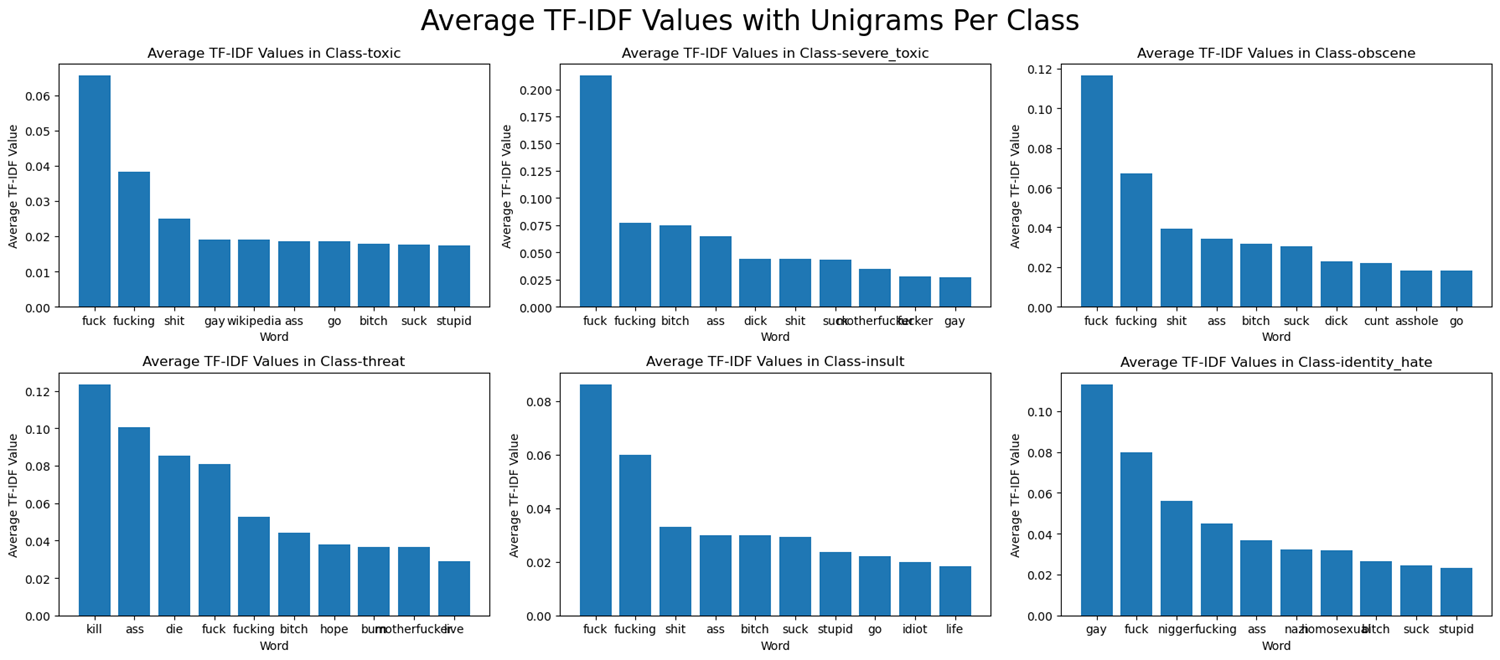

# Create Sequential Model(LSTM)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [37]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [38]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          4800032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [40]:
history = model.fit(train, epochs=1, validation_data=val)

677/677 [==============================] - 1247s 2s/step - loss: 0.1125 - val_loss: 0.0662


In [41]:
from matplotlib import pyplot as plt

In [39]:
#plt.figure(figsize=(8,5))
#pd.DataFrame(history.history).plot()
#plt.show()


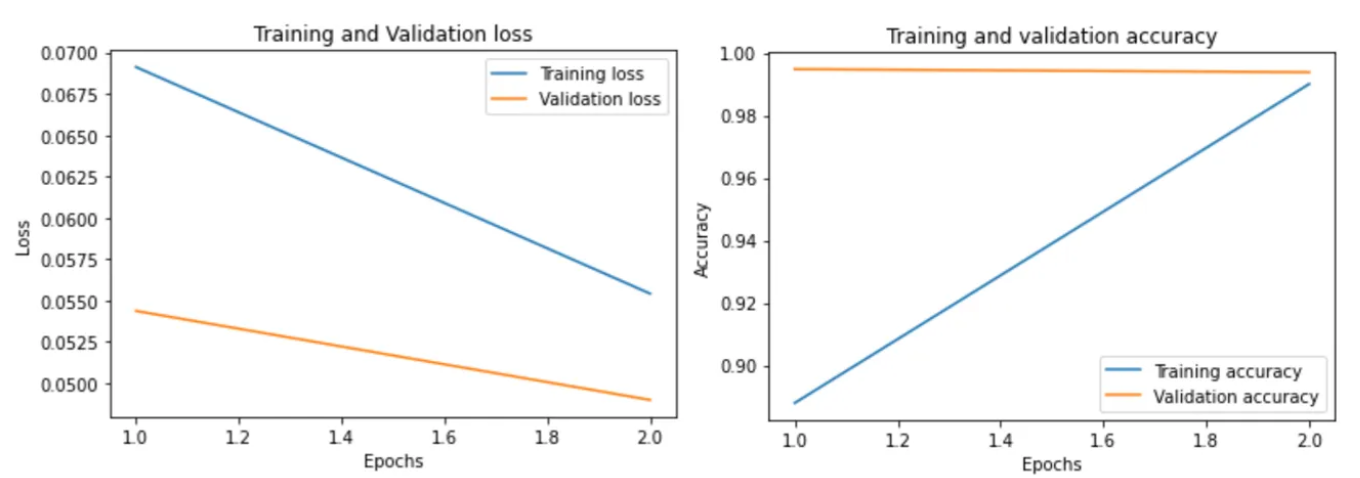

#  Make Predictions

In [42]:
batch = test.as_numpy_iterator().next()

In [43]:
input_text = vectorizer('You freaking suck!')

In [44]:
model.predict(np.array([input_text]))

1/1 [==============================] - 2s 2s/step


array([[0.7885239 , 0.09266808, 0.49503732, 0.07248882, 0.4346735 ,
        0.08214185]], dtype=float32)

In [45]:
res = model.predict(np.expand_dims(input_text,0))
res

1/1 [==============================] - 0s 214ms/step


array([[0.7885239 , 0.09266808, 0.49503732, 0.07248882, 0.4346735 ,
        0.08214185]], dtype=float32)

In [46]:
(res > 0.5).astype(int)

array([[1, 0, 0, 0, 0, 0]])

In [47]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [48]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 327ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [49]:
res.shape

(1, 6)

# Evaluate Model

In [50]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [51]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [52]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 323ms/step


In [53]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.8999999761581421, Recall:0.524781346321106, Accuracy:0.46875


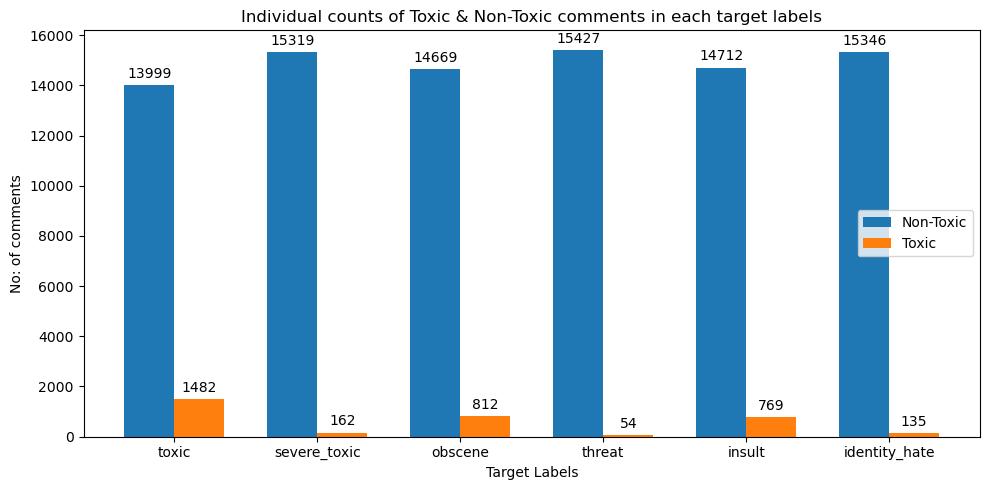

In [54]:
labels = df.columns.values[2:]
class_0=[]
class_1=[]

for i in df.columns.values[2:]:
    vc=df[i].value_counts()
    class_0.append(vc[0])
    class_1.append(vc[1])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, class_0, width, label='Non-Toxic')
rects2 = ax.bar(x + width/2, class_1, width, label='Toxic')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No: of comments')
ax.set_xlabel("Target Labels")
ax.set_title('Individual counts of Toxic & Non-Toxic comments in each target labels')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc=7)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

ax.bar
fig.tight_layout()

plt.show()

In [55]:
lbls=df.values[:,2:] #taking only target label data for all rows 
lbls=np.array(lbls,dtype=int) #converting into numpy array
col_lbls=np.unique(lbls, return_counts=True,axis=0)
col_lbls_df=pd.DataFrame(columns=df.columns.values[2:],data=col_lbls[0])
col_lbls_df['count']=col_lbls[1]
col_lbls_df=col_lbls_df.sort_values(by=['count'],ascending=False)


print("Shape of the Collective Labels (including count-column) = ",col_lbls_df.shape)
print("\n")
col_lbls_df

Shape of the Collective Labels (including count-column) =  (33, 7)




,toxic,severe_toxic,obscene,threat,insult,identity_hate,count
0,0,0,0,0,0,0,13913
9,1,0,0,0,0,0,547
17,1,0,1,0,1,0,354
15,1,0,1,0,0,0,163
11,1,0,0,0,1,0,127
28,1,1,1,0,1,0,102
18,1,0,1,0,1,1,67
2,0,0,0,0,1,0,28
5,0,0,1,0,0,0,28
29,1,1,1,0,1,1,19


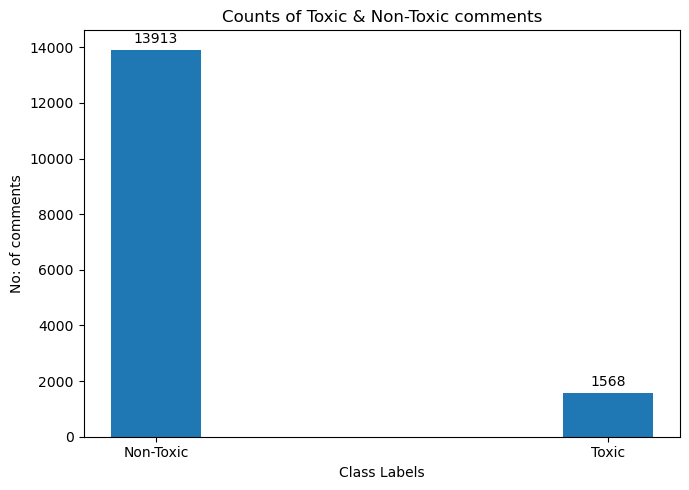

In [56]:
Categories=["Non-Toxic","Toxic"]
values=[0,0]

for row in col_lbls_df.values:
    if (sum(row[:-1])==0):
        values[0]=values[0]+row[-1]
    else:
        values[1]=values[1]+row[-1]

fig, ax = plt.subplots(figsize=(7,5))
rects1 = ax.bar(Categories, values, 0.2)
ax.set_ylabel('No: of comments')
ax.set_xlabel("Class Labels")
ax.set_title('Counts of Toxic & Non-Toxic comments')
ax.bar_label(rects1, padding=3)
fig.tight_layout()
plt.show()

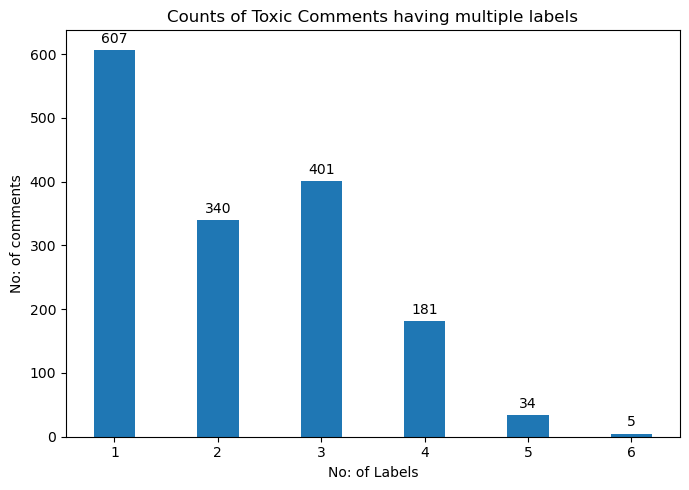

In [57]:
no_of_possible_labels=np.arange(1,7)
values=np.zeros(6,dtype=int)

for row in col_lbls_df.values:
    if (sum(row[:-1])==1):
        values[0]=values[0]+row[-1]

    elif (sum(row[:-1])==2):
        values[1]=values[1]+row[-1]

    elif (sum(row[:-1])==3):
        values[2]=values[2]+row[-1]
    
    elif (sum(row[:-1])==4):
        values[3]=values[3]+row[-1]
    
    elif (sum(row[:-1])==5):
        values[4]=values[4]+row[-1]

    elif (sum(row[:-1])==6):
        values[5]=values[5]+row[-1]

fig, ax = plt.subplots(figsize=(7,5))
rects1 = ax.bar(no_of_possible_labels, values, 0.4)
ax.set_ylabel('No: of comments')
ax.set_xlabel("No: of Labels")
ax.set_title('Counts of Toxic Comments having multiple labels')
ax.bar_label(rects1, padding=3)
fig.tight_layout()
plt.show()

In [58]:
!pip install venn

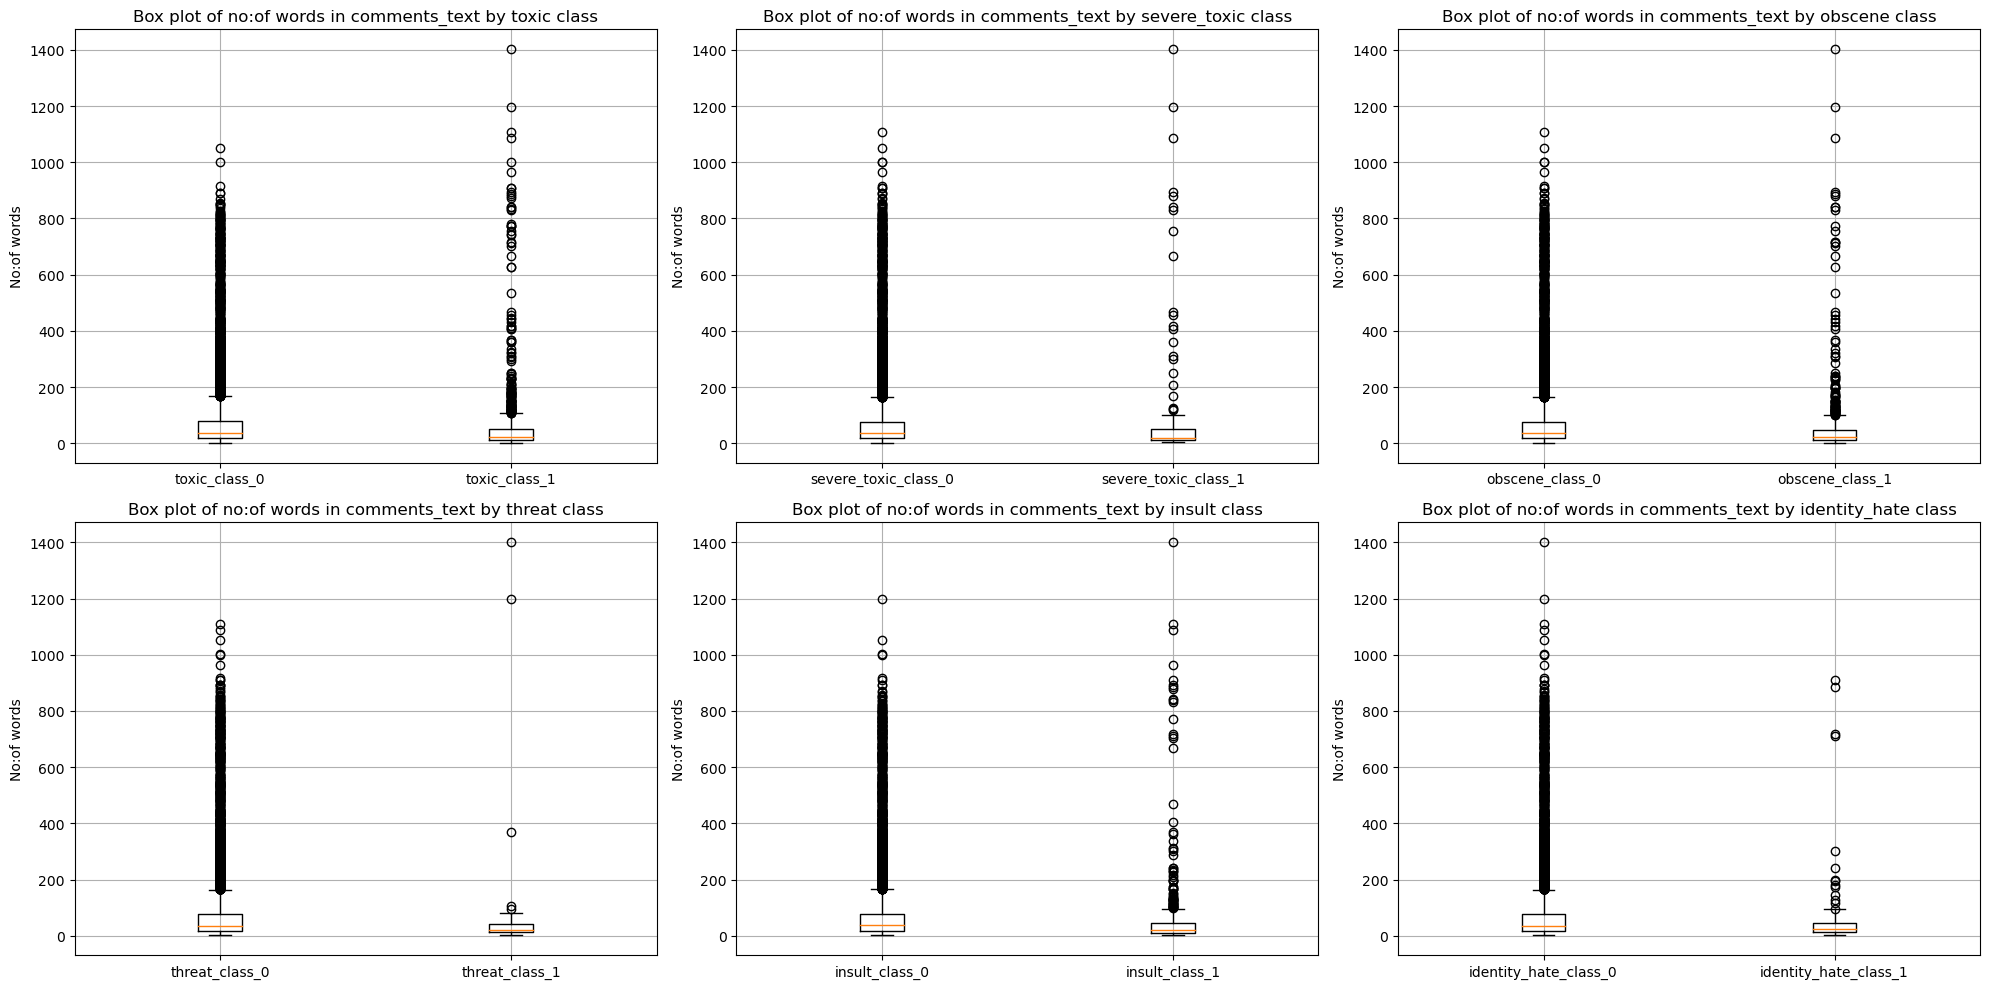

In [59]:
class_0=[]
class_1=[]
plt.figure(figsize=(20,10))
count=1
for col in df.columns[2:]:
    toxic_class_0 = df[df[col]==0]['comment_text'].str.split().apply(len)
    toxic_class_0_count = toxic_class_0.values
    class_0.append(toxic_class_0_count)
    toxic_class_1 = df[df[col]==1]['comment_text'].str.split().apply(len)
    toxic_class_1_count = toxic_class_1.values
    class_1.append(toxic_class_1_count)

    plt.subplot(2,3,count)
    plt.boxplot([class_0[count-1], class_1[count-1]])
    plt.title('Box plot of no:of words in comments_text by '+str(col)+' class')
    plt.xticks([1,2],(str(col)+'_class_0',str(col)+'_class_1'))
    plt.ylabel('No:of words')
    plt.tight_layout()
    plt.grid()
    count=count+1
plt.show()

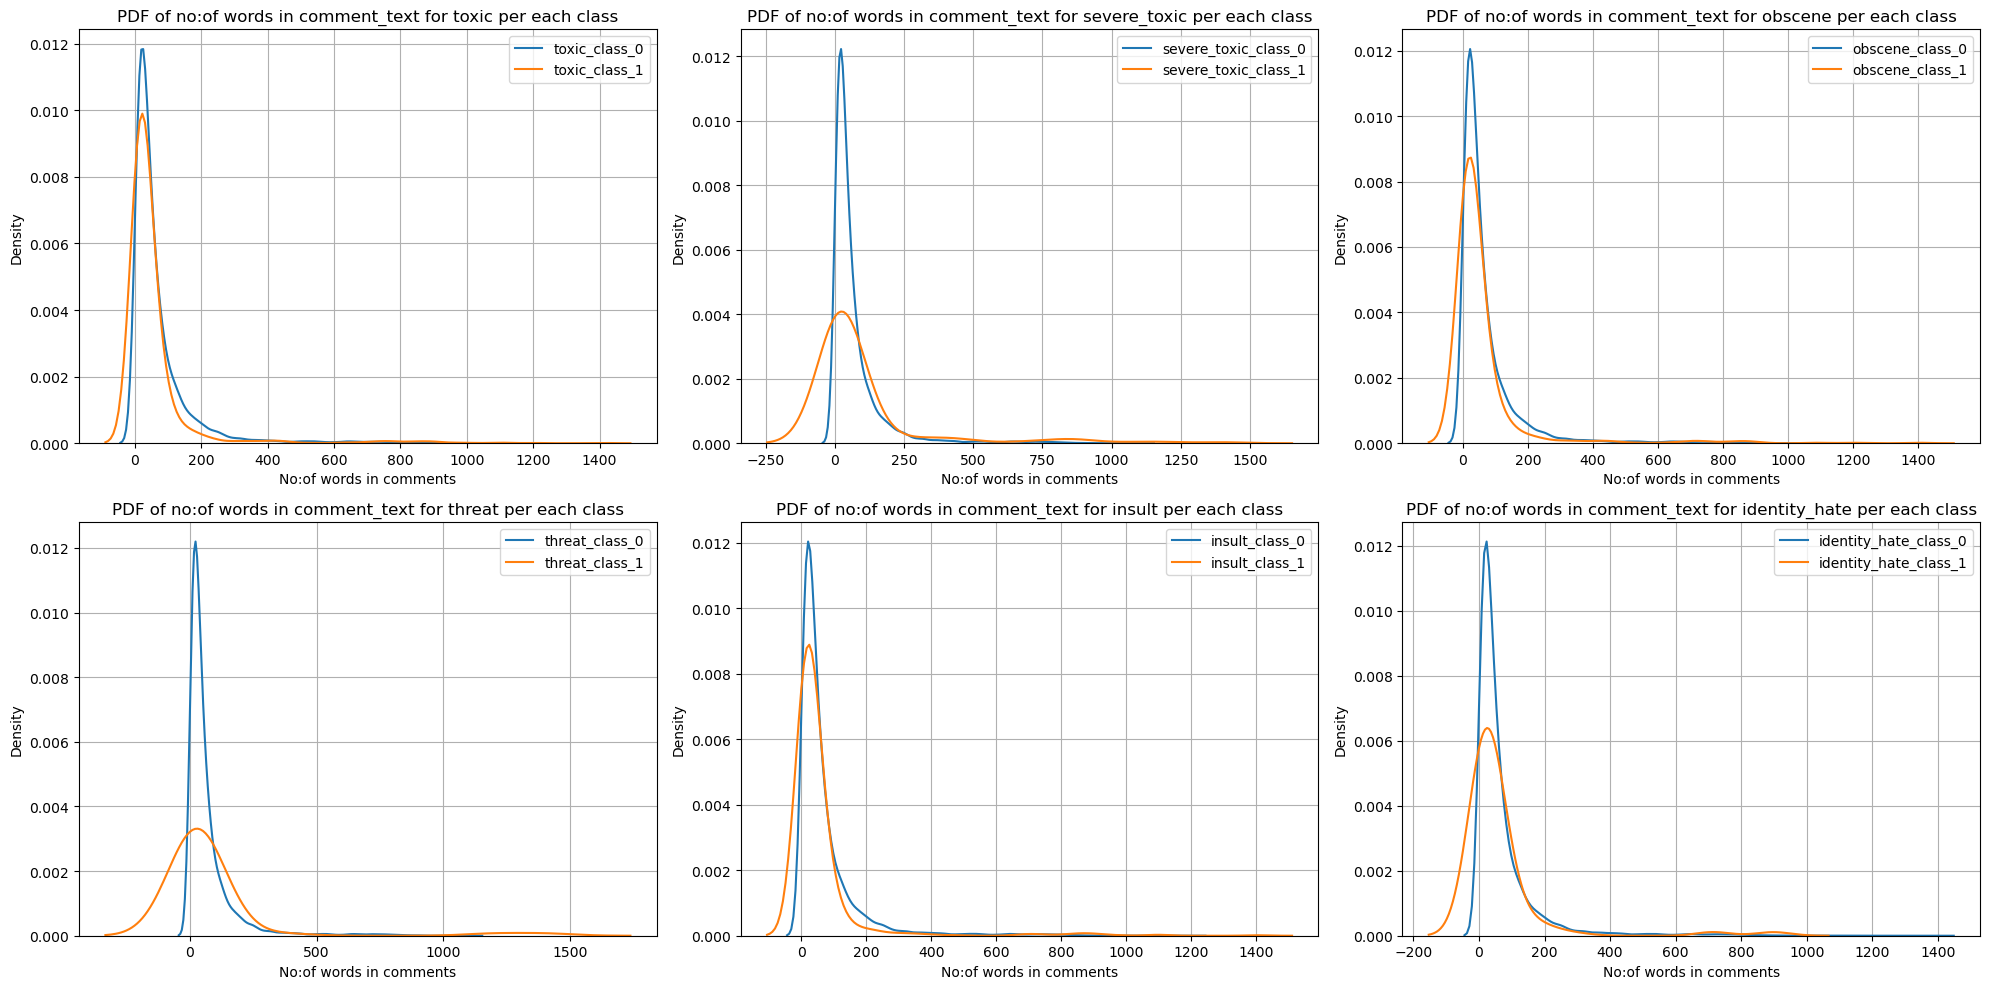

In [60]:
plt.figure(figsize=(20,10))
count=1
for col in df.columns[2:]:
    plt.subplot(2,3,count)
    sns.distplot(class_0[count-1], hist=False, label=str(col)+'_class_0')
    sns.distplot(class_1[count-1], hist=False, label=str(col)+'_class_1')
    plt.title('PDF of no:of words in comment_text for '+str(col)+' per each class')
    plt.xlabel('No:of words in comments')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    count=count+1
plt.show()

In [61]:
 !pip install wordcloud

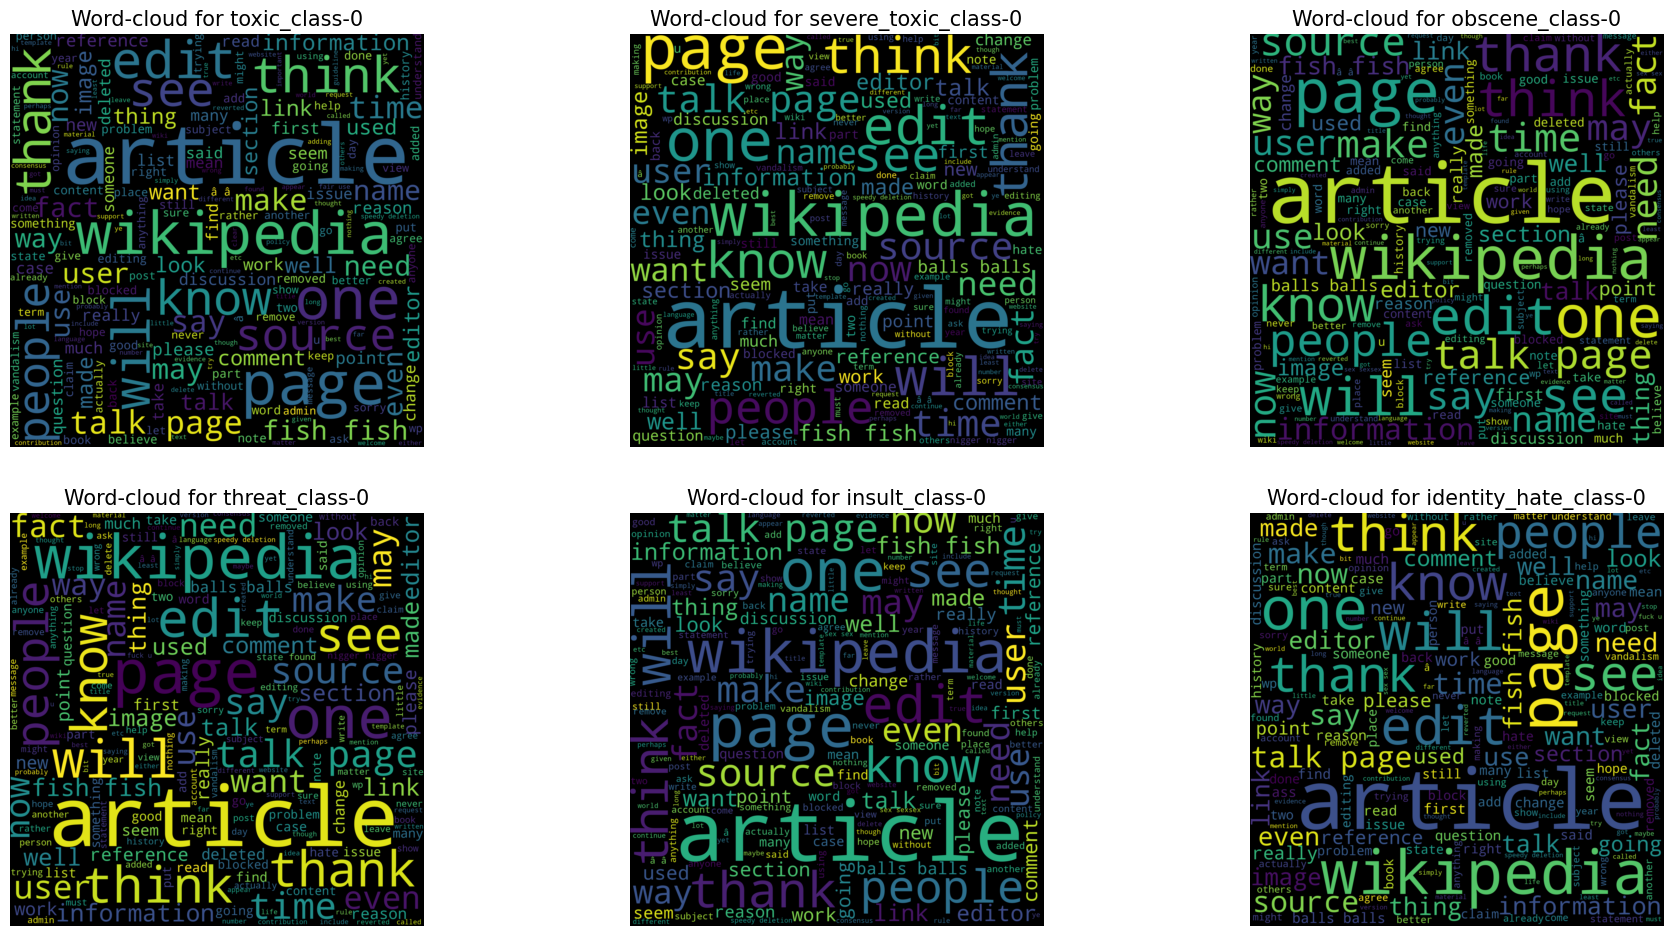

In [62]:
from wordcloud import WordCloud
from nltk.corpus import stopwords 
plt.figure(figsize=(20,10))
count=1
for col in df.columns[2:]:
    toxic_class_0 = df[df[col]==0]['comment_text'].str.lower().values
    wordcloud = WordCloud(width=2000, height=2000,
                          background_color ='black', margin=1
                          ).generate(" ".join(toxic_class_0))

    plt.subplot(2,3,count)
    plt.axis("off")
    plt.title("Word-cloud for "+col+"_class-0",fontsize=15)
    plt.tight_layout(pad=3)
    plt.imshow(wordcloud,interpolation='bilinear')
    count=count+1
plt.show()


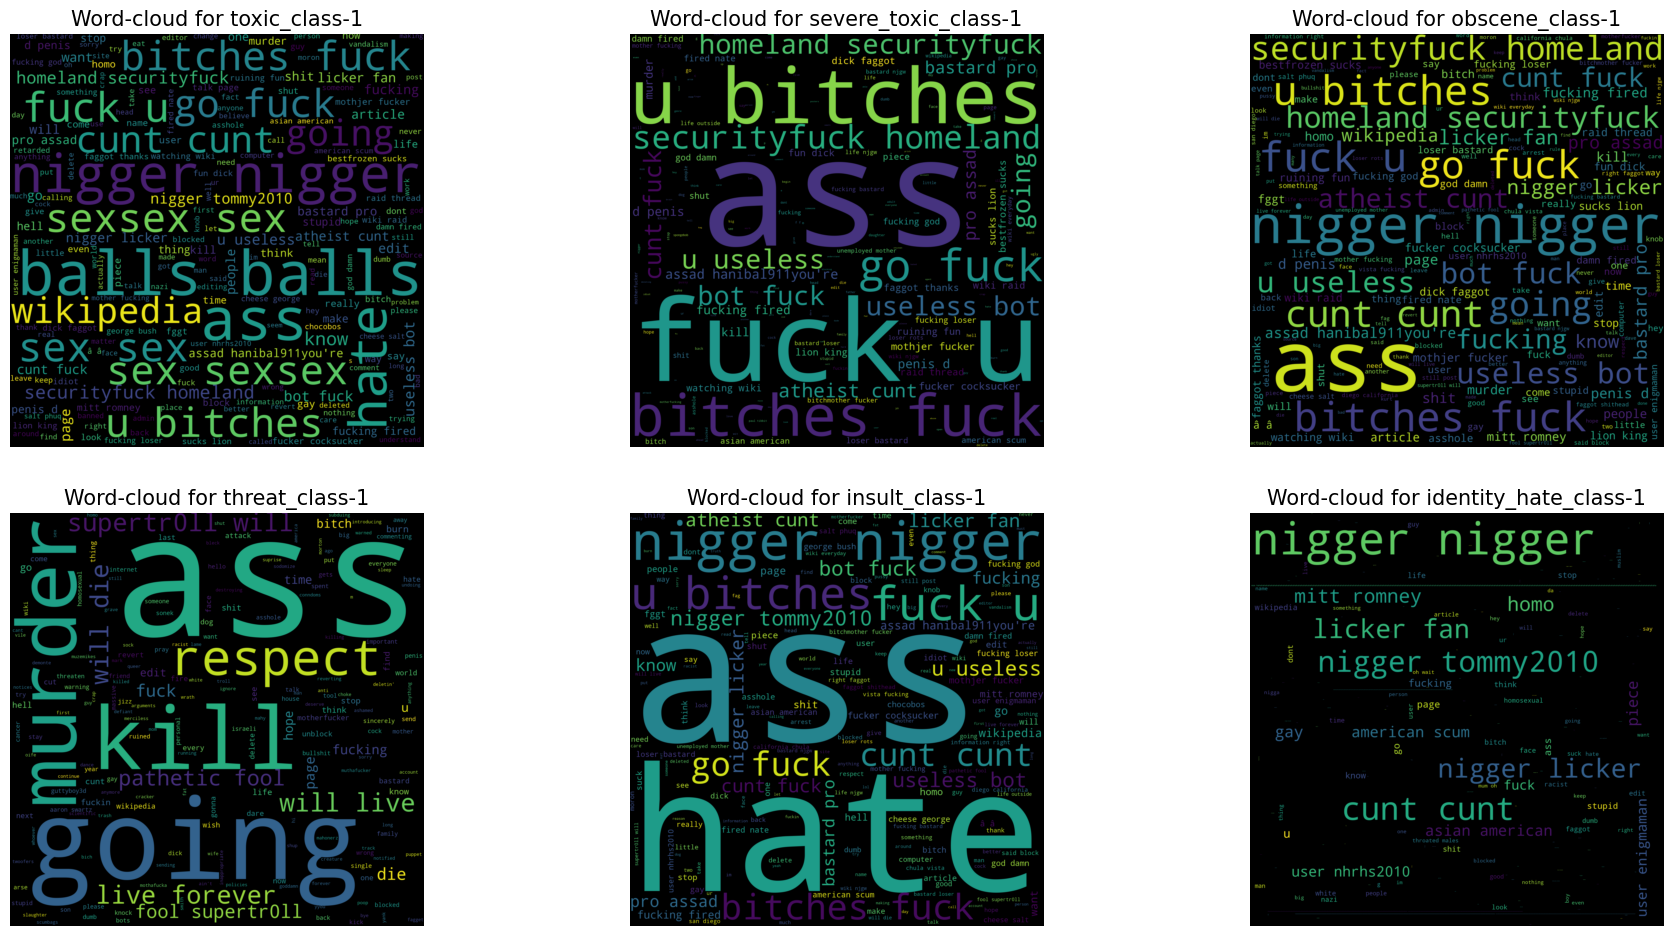

In [63]:
plt.figure(figsize=(20,10))
count=1
for col in df.columns[2:]:
    toxic_class_1 = df[df[col]==1]['comment_text'].str.lower().values
    wordcloud = WordCloud(width=2000, height=2000,
                          background_color ='black', margin=1
                          ).generate(" ".join(toxic_class_1))

    plt.subplot(2,3,count)
    plt.axis("off")
    plt.title("Word-cloud for "+col+"_class-1",fontsize=15)
    plt.tight_layout(pad=3)
    plt.imshow(wordcloud,interpolation='bilinear')
    count=count+1
plt.show()


#  Test and Gradio

In [64]:
!pip install gradio jinja2

In [65]:
pip install typing_extensions

Note: you may need to restart the kernel to use updated packages.


In [66]:
pip install dataclasses

In [67]:
import tensorflow as tf
from dataclasses import dataclass
import gradio as gr
from typing_extensions import dataclass_transform

In [68]:
model.save('toxicity.h5')

In [69]:
model = tf.keras.models.load_model('toxicity.h5')

In [70]:
input_str = vectorizer('hey i freaken hate you!')

In [71]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 2s 2s/step


In [72]:
res

array([[0.6863934 , 0.06777337, 0.38369963, 0.06715403, 0.35018054,
        0.07026394]], dtype=float32)

In [73]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [74]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Enter the comment to calculate the toxicity'),
                        outputs='text')

In [75]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://2322313a-82e8-42bb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


1/1 [==============================] - 0s 214ms/step
